# The HR diagram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x7f44e156c790>)

In [3]:
import pandas as pd
df_stars = pd.read_csv("stars.csv")

In [4]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


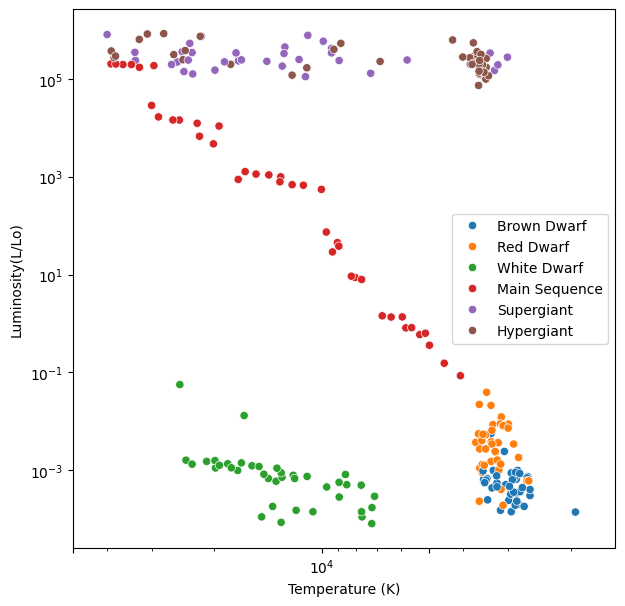

In [9]:
import seaborn as sns

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

In [10]:
# prepare data for PCA
X = np.zeros((len(df_stars), 4))
X[:,0] = df_stars['Temperature (K)']
X[:,1] = df_stars['Luminosity(L/Lo)']
X[:,2] = df_stars['Radius(R/Ro)']
X[:,3] = df_stars['Absolute magnitude(Mv)']
#X[:,4] = df_stars['Star type']
X.shape

(240, 4)

In [11]:
# Check if there are NaN values
for i in range(len(X[0])):
    nan_check_arr = np.isnan(X[:,i])
    nan_count = 0
    for k in nan_check_arr:
        if k==True:
            nan_count += 1
    print(nan_count)

0
0
0
0


In [14]:
pca = PCA(n_components= 4 ) 
pca.fit(X) 

eigenvalues = pca.transform(X) 
mean = pca.mean_ 
eigenvectors = pca.components_

print('eigenvalues ',eigenvalues.shape)
print('eigenvectors ',eigenvectors.shape)

evals = pca.explained_variance_ratio_ 
print(evals)

eigenvalues  (240, 4)
eigenvectors  (4, 4)
[9.97606313e-01 2.38789920e-03 5.78677260e-06 1.34274189e-09]


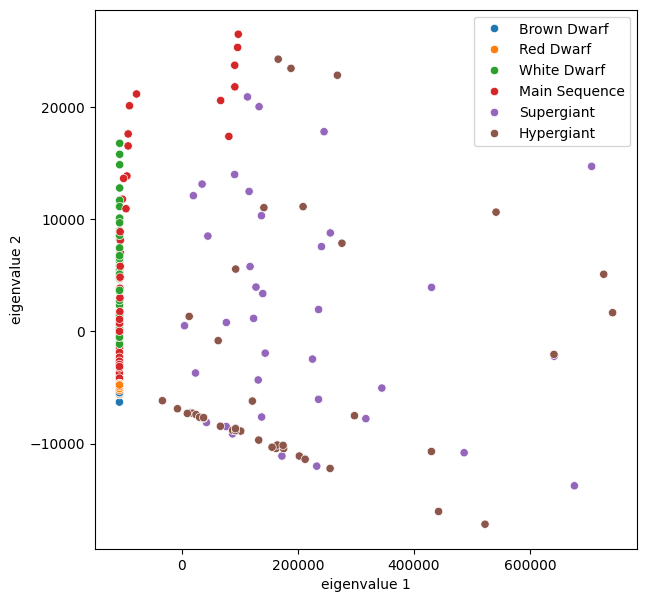

In [23]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=eigenvalues[:,0], y=eigenvalues[:,1], hue=labels)

plt.xlabel('eigenvalue 1')
plt.ylabel('eigenvalue 2')
plt.show()

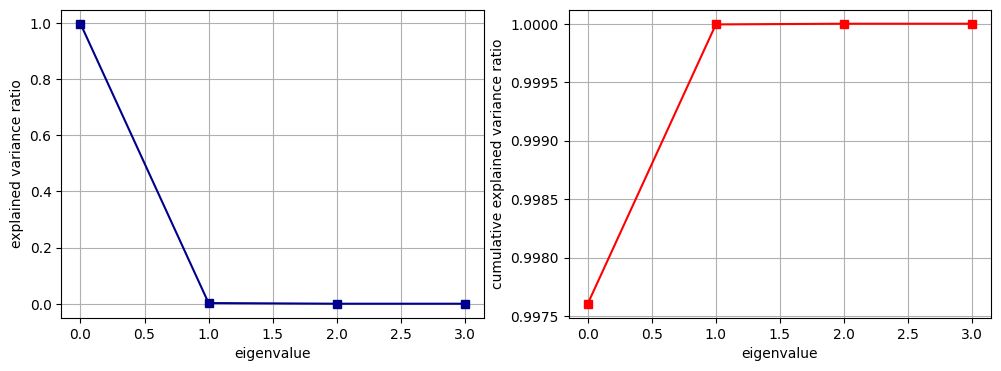

99.7606 %
0.2388 %
0.0006 %
0.0 %


In [24]:
# explained variance ratio 
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
plt.plot(evals,'s-',c='darkblue')
plt.xlabel("eigenvalue")
plt.ylabel("explained variance ratio")
plt.grid()

# cumulative
evals_C = evals.copy()
for i in range(1,len(evals)):
    evals_C[i] += evals_C[i-1]
ax = fig.add_subplot(122)
ax.plot(evals_C,'s-',c='red',label='cumulative')
plt.xlabel("eigenvalue")
plt.ylabel("cumulative explained variance ratio")
plt.grid()
plt.show()

for e in evals:
    print( round(e*100,4),'%')

### Linear affine transformation (-1,1)

In [58]:
manual = False
Xlin = X.copy()
for j in range(len(Xlin[0])):
    M = max(abs(X[:,j]))
    Xlin[:,j] = X[:,j] / M

if manual==False:
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    Xlin = scaler.fit_transform(X)

In [59]:
pca = PCA(n_components= 4 ) 
pca.fit(Xlin) 

eigenvalues = pca.transform(Xlin) 
mean = pca.mean_ 
eigenvectors = pca.components_

print('eigenvalues ',eigenvalues.shape)
print('eigenvectors ',eigenvectors.shape)

evals = pca.explained_variance_ratio_ 
print(evals)

eigenvalues  (240, 4)
eigenvectors  (4, 4)
[0.63752162 0.21432776 0.0843245  0.06382612]


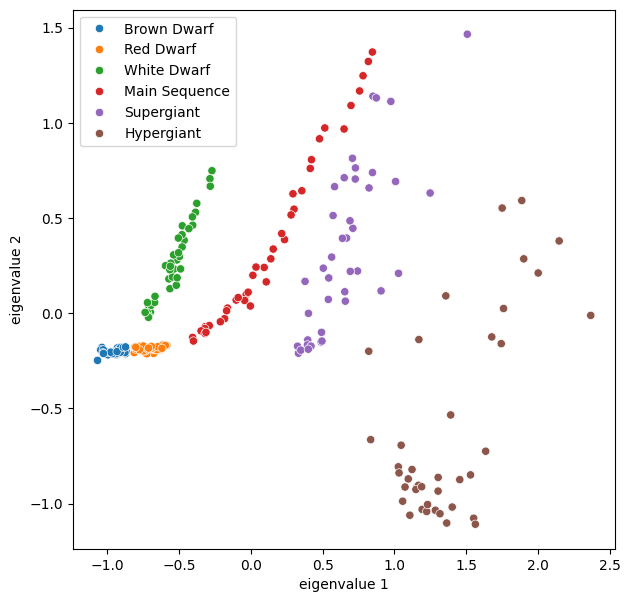

In [60]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=eigenvalues[:,0], y=eigenvalues[:,1], hue=labels)

plt.xlabel('eigenvalue 1')
plt.ylabel('eigenvalue 2')
plt.show()

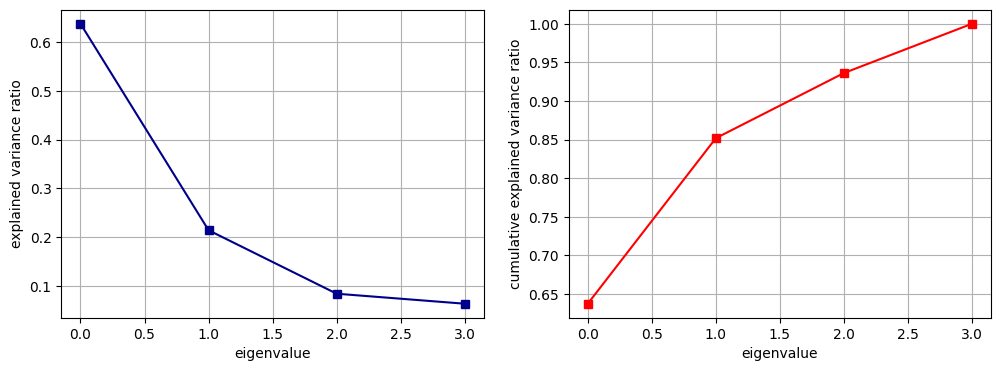

63.75 %
21.43 %
8.43 %
6.38 %


In [61]:
# explained variance ratio 
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
ax.plot(evals,'s-',c='darkblue')
plt.xlabel("eigenvalue")
plt.ylabel("explained variance ratio")
plt.grid()

# cumulative
evals_C = evals.copy()
for i in range(1,len(evals)):
    evals_C[i] += evals_C[i-1]
ax = fig.add_subplot(122)
ax.plot(evals_C,'s-',c='red',label='cumulative')
plt.xlabel("eigenvalue")
plt.ylabel("cumulative explained variance ratio")
plt.grid()
plt.show()

for e in evals:
    print( round(e*100,2),'%')

### Standardization

In [29]:
# standardization
scaler = StandardScaler()
Xstand = scaler.fit_transform(X)
Xstand.shape

(240, 4)

In [30]:
pca = PCA(n_components= 4 ) 
pca.fit(Xstand) 

eigenvalues = pca.transform(Xstand) 
mean = pca.mean_ 
eigenvectors = pca.components_

print('eigenvalues ',eigenvalues.shape)
print('eigenvectors ',eigenvectors.shape)

evals = pca.explained_variance_ratio_ 
print(evals)

eigenvalues  (240, 4)
eigenvectors  (4, 4)
[0.60357391 0.23500784 0.09329645 0.0681218 ]


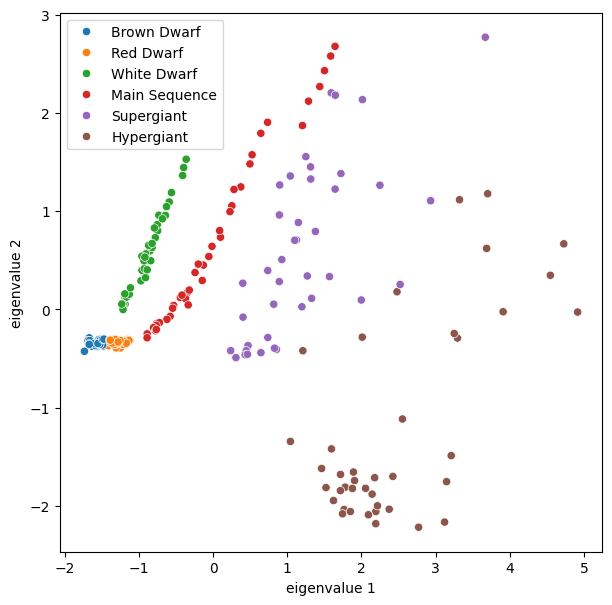

In [31]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=eigenvalues[:,0], y=eigenvalues[:,1], hue=labels)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('eigenvalue 1')
plt.ylabel('eigenvalue 2')
plt.show()

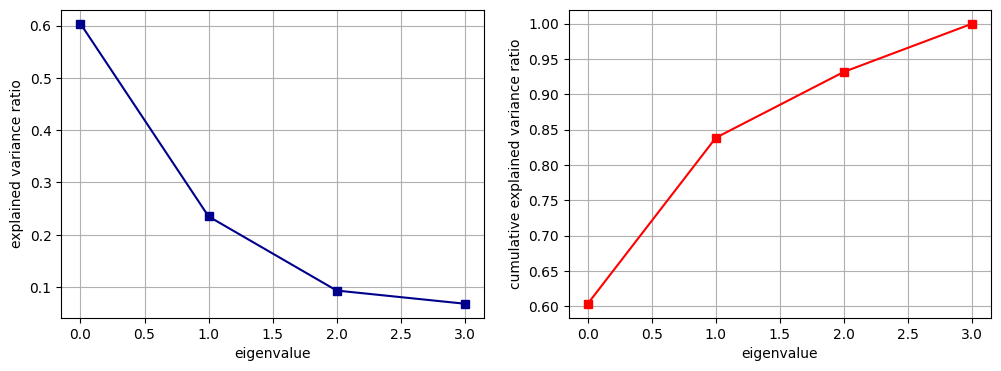

60.36 %
23.5 %
9.33 %
6.81 %


In [32]:
# explained variance ratio 
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
ax.plot(evals,'s-',c='darkblue')
plt.xlabel("eigenvalue")
plt.ylabel("explained variance ratio")
plt.grid()

# cumulative
evals_C = evals.copy()
for i in range(1,len(evals)):
    evals_C[i] += evals_C[i-1]
ax = fig.add_subplot(122)
ax.plot(evals_C,'s-',c='red',label='cumulative')
plt.xlabel("eigenvalue")
plt.ylabel("cumulative explained variance ratio")
plt.grid()
plt.show()

for e in evals:
    print( round(e*100,2),'%')